In [1]:
import h2o
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators import H2ONaiveBayesEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.451-b10, mixed mode)
  Starting server from D:\UPC\big_data_h2o_clase\my_env\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\USER\AppData\Local\Temp\tmp1kv1l3ht
  JVM stdout: C:\Users\USER\AppData\Local\Temp\tmp1kv1l3ht\h2o_USER_started_from_python.out
  JVM stderr: C:\Users\USER\AppData\Local\Temp\tmp1kv1l3ht\h2o_USER_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 6 days
H2O_cluster_name:,H2O_from_python_USER_pbgi86
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.253 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


# Carga de datos

In [3]:
data_h2o = h2o.import_file(
                path   = "diabetes.csv",
                header = 1,
                sep    = ",",
                destination_frame = "datos_h2o"
            )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Exploración de los datos

In [4]:
data_h2o.head(5)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_h2o.describe()

Rows:768
Cols:9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [6]:
data_h2o['Outcome'] = data_h2o['Outcome'].asfactor()

In [7]:
data_h2o.summary()

C:\Users\USER\AppData\Local\Temp\ipykernel_39692\953057791.py:1: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  data_h2o.summary()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,
zeros,111,5,35,227,374,11,0,0,
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [8]:
df = data_h2o.as_data_frame(use_multi_thread=True)

d:\UPC\big_data_h2o_clase\my_env\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


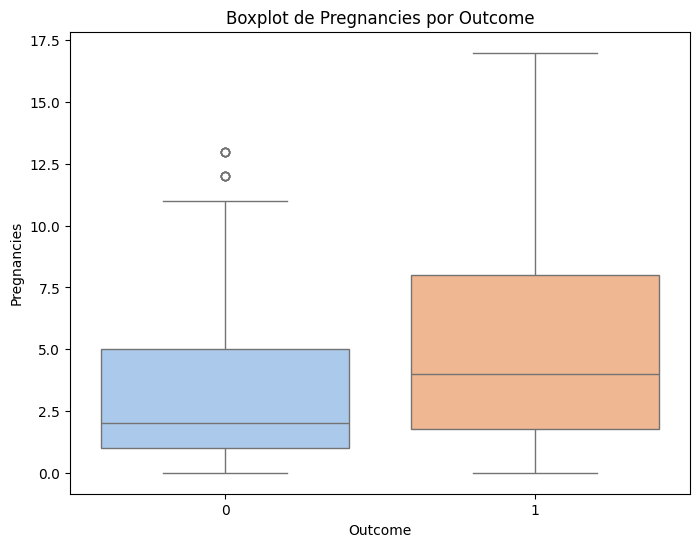

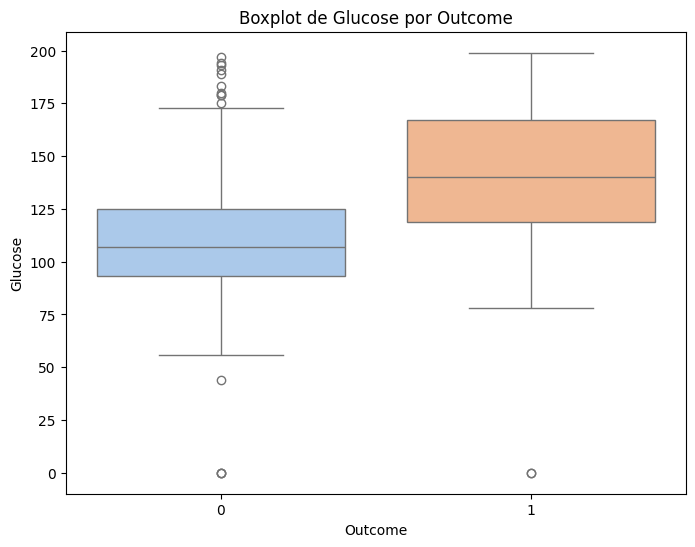

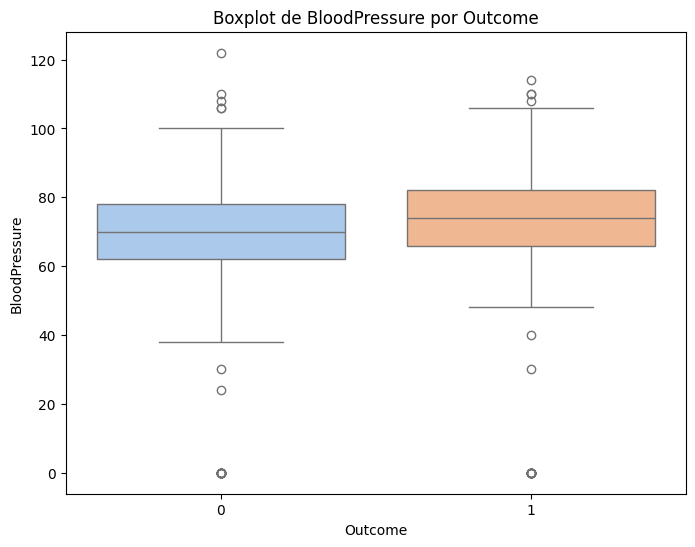

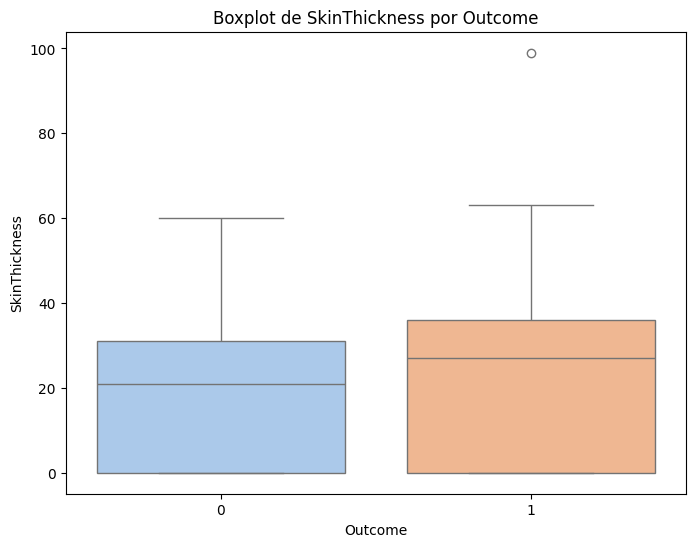

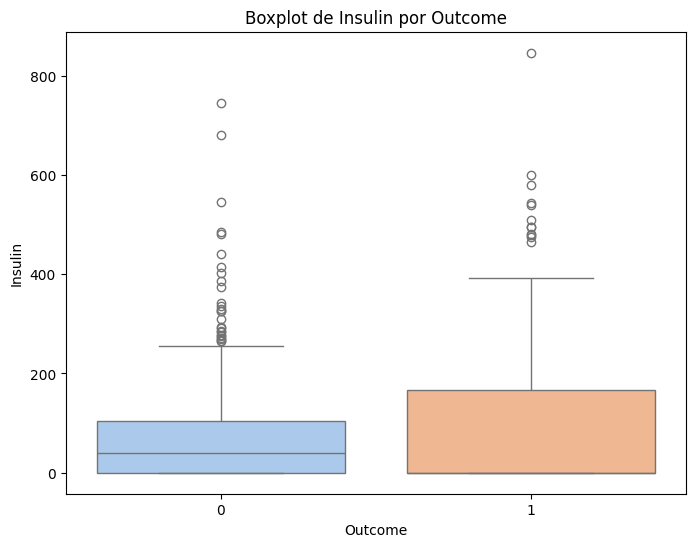

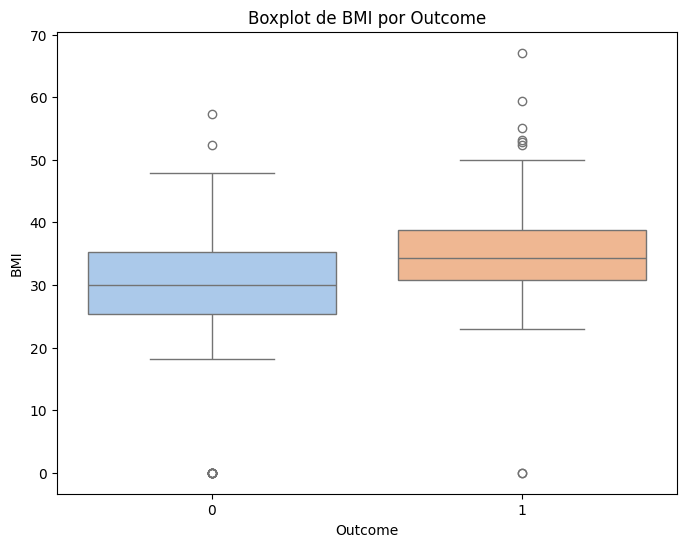

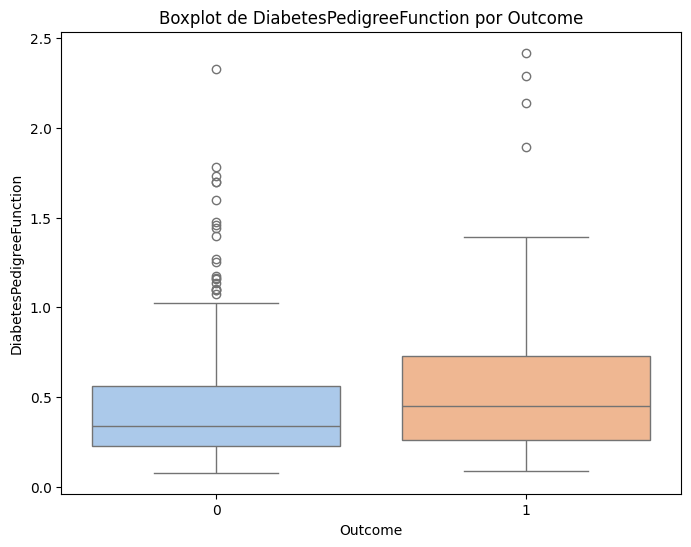

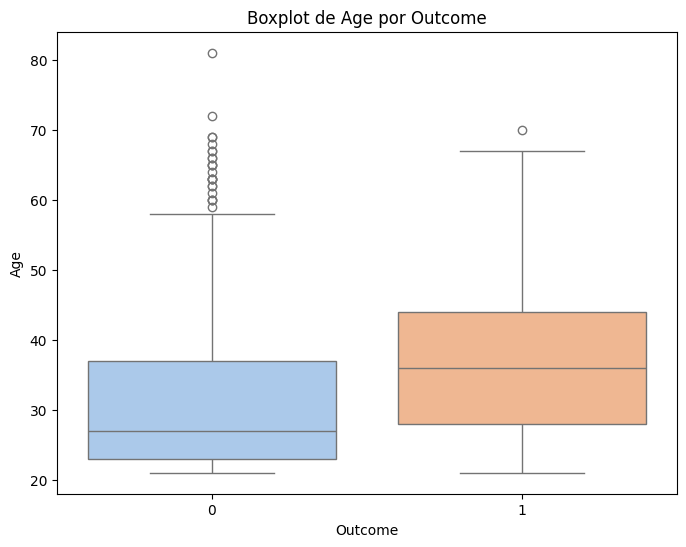

In [9]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df, x='Outcome', y=col, hue='Outcome', palette='pastel', legend=False)
    plt.title('Boxplot de {} por Outcome'.format(col))
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

In [11]:
for col in num_cols:
    test_res = ss.shapiro(df[col])
    if test_res[1] > 0.05:
        print(f"La distribución de {col} es normal")
    else:
        print(f"La distribución de {col} no es normal")

La distribución de Pregnancies no es normal
La distribución de Glucose no es normal
La distribución de BloodPressure no es normal
La distribución de SkinThickness no es normal
La distribución de Insulin no es normal
La distribución de BMI no es normal
La distribución de DiabetesPedigreeFunction no es normal
La distribución de Age no es normal


In [12]:
#Probar homgeneidad de varianzas

In [13]:
import scipy.stats as stats


num_cols = df.select_dtypes(include='number').columns.drop('Outcome')

results = []

for col in num_cols:
    data0 = df.loc[df['Outcome']==0, col].dropna()
    data1 = df.loc[df['Outcome']==1, col].dropna()
    
    # Levene (más robusto)
    stat_lev, p_lev = stats.levene(data0, data1, center='median')
    # Bartlett (requiere normalidad)
    stat_bar, p_bar = stats.bartlett(data0, data1)
    # Fligner–Killeen (no paramétrico y robusto)
    stat_flg, p_flg = stats.fligner(data0, data1)
    
    results.append({
        'variable': col,
        'Levene_p': p_lev,
        'Bartlett_p': p_bar,
        'Fligner_p': p_flg
    })

# Convertir resultados a DataFrame
df_homogeneidad = pd.DataFrame(results)
print(df_homogeneidad)

                   variable  Levene_p    Bartlett_p     Fligner_p
0               Pregnancies  0.000002  3.168886e-05  1.061921e-07
1                   Glucose  0.000006  5.892877e-05  6.276164e-07
2             BloodPressure  0.191118  8.838243e-04  3.376347e-01
3             SkinThickness  0.000975  6.147455e-04  1.010218e-06
4                   Insulin  0.000027  4.615075e-11  3.653696e-01
5                       BMI  0.105924  2.900159e-01  5.022451e-02
6  DiabetesPedigreeFunction  0.000625  3.180170e-05  4.356018e-06
7                       Age  0.136186  7.641092e-02  3.469707e-04


Cómo interpretar cada p-valor (α=0.05):
- Si p ≥ 0.05 ⇒ no rechazamos H₀ de varianzas iguales.
- Si p < 0.05 ⇒ rechazamos H₀: las varianzas difieren significativamente entre grupos


In [14]:
from scipy.stats import mannwhitneyu

num_cols = df.select_dtypes(include='number').columns.drop('Outcome')

for col in num_cols:
    data0 = df.loc[df['Outcome']==0, col].dropna()
    data1 = df.loc[df['Outcome']==1, col].dropna()
    
    stat, pval = mannwhitneyu(data0, data1, alternative='two-sided')
    print(f"{col}: U={stat:.2f}, p={pval:.4f}")

Pregnancies: U=50985.00, p=0.0000
Glucose: U=28390.50, p=0.0000
BloodPressure: U=55414.50, p=0.0001
SkinThickness: U=59814.00, p=0.0130
Insulin: U=61926.50, p=0.0657
BMI: U=41866.00, p=0.0000
DiabetesPedigreeFunction: U=52769.00, p=0.0000
Age: U=41950.00, p=0.0000


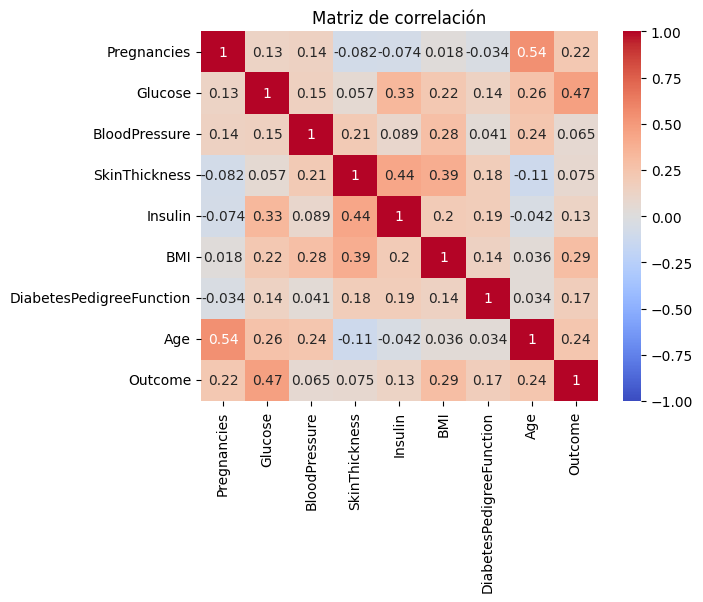

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

# Valor de la información

[INFO] creating woe binning ...


d:\UPC\big_data_h2o_clase\my_env\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
d:\UPC\big_data_h2o_clase\my_env\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
d:\UPC\big_data_h2o_clase\my_env\lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

                   variable        IV
0                   Glucose  1.304807
1                       BMI  0.639655
2                       Age  0.560548
3                   Insulin  0.448643
4               Pregnancies  0.335914
5             SkinThickness  0.299877
6             BloodPressure  0.181676
7  DiabetesPedigreeFunction  0.178632


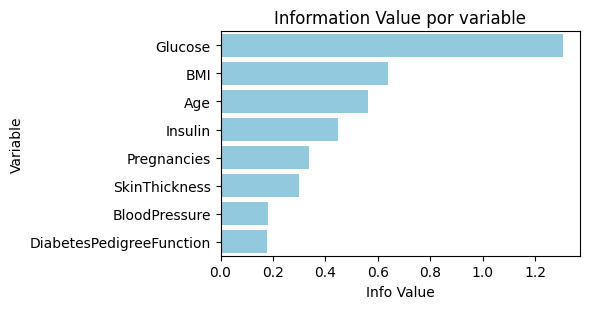

In [16]:
# ## 6. Information Value
import pandas as pd
import scorecardpy as sc

# 1) Generar bins
df['Outcome'] = df['Outcome'].astype(int)
bins = sc.woebin(df, y='Outcome')

# 2) Recolectar IVs
iv_dict = {}
for var, bdf in bins.items():
    # The total_iv for a variable is already the same across all its bins in the dataframe
    if not bdf.empty:
        # Get the total_iv value from the first row (they are all the same)
        iv_value = bdf['total_iv'].iloc[0]
        iv_dict[var] = iv_value


# 3) DataFrame ordenado
iv_df = (
    pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
      .sort_values('IV', ascending=False)
      .reset_index()
      .rename(columns={'index':'variable'})
)
print(iv_df)

# 4) Plot opcional
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, len(iv_df)*0.4))
sns.barplot(x='IV', y='variable', data=iv_df, color='skyblue')
plt.title("Information Value por variable")
plt.xlabel("Info Value")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

d:\UPC\big_data_h2o_clase\my_env\lib\site-packages\scorecardpy\woebin.py:1304: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bins = bins.groupby('variable', group_keys=False).apply(gb_distr)


{'Glucose': <Figure size 640x480 with 2 Axes>,
 'SkinThickness': <Figure size 640x480 with 2 Axes>,
 'BMI': <Figure size 640x480 with 2 Axes>,
 'BloodPressure': <Figure size 640x480 with 2 Axes>,
 'Pregnancies': <Figure size 640x480 with 2 Axes>,
 'Age': <Figure size 640x480 with 2 Axes>,
 'Insulin': <Figure size 640x480 with 2 Axes>,
 'DiabetesPedigreeFunction': <Figure size 640x480 with 2 Axes>}

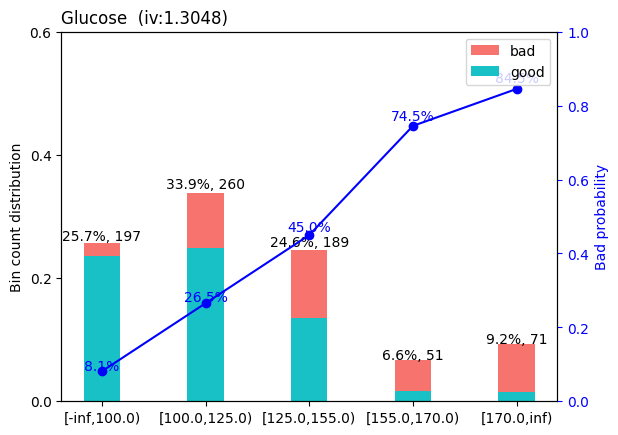

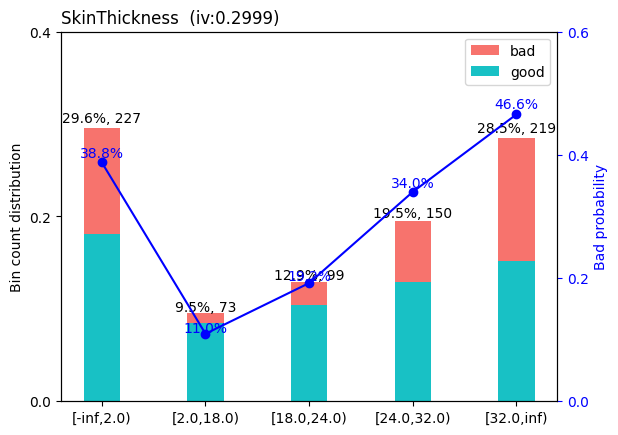

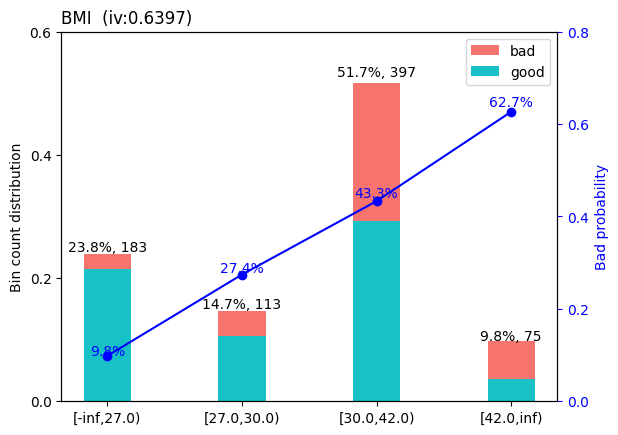

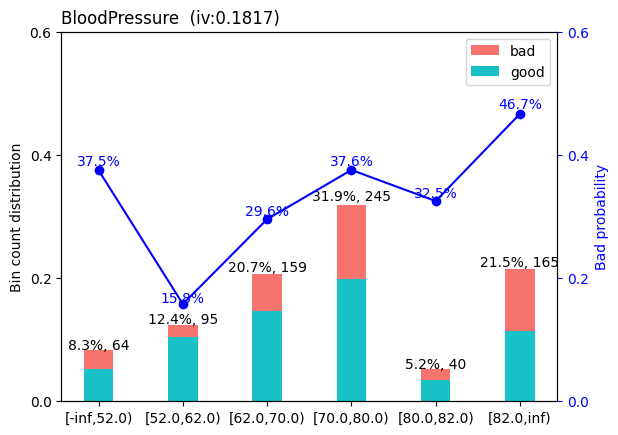

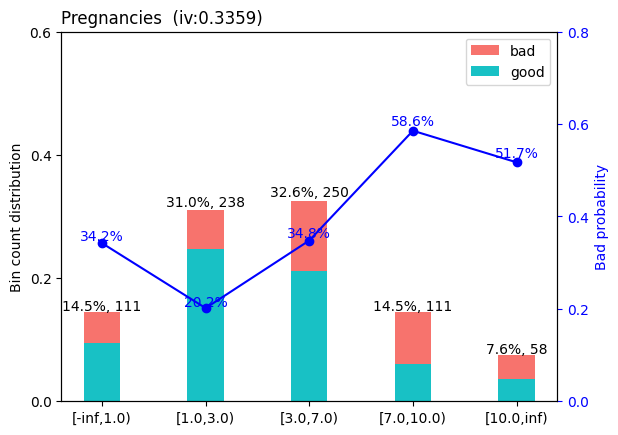

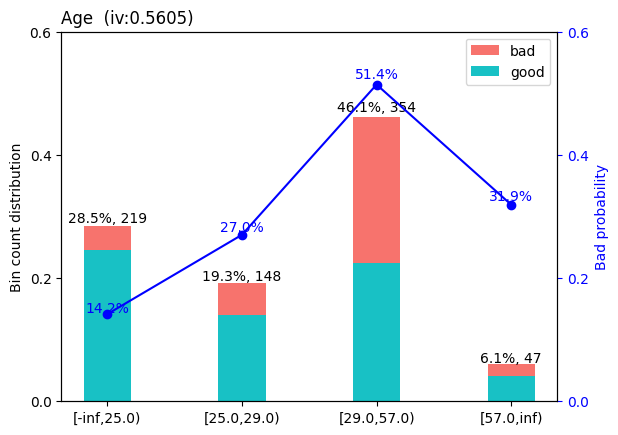

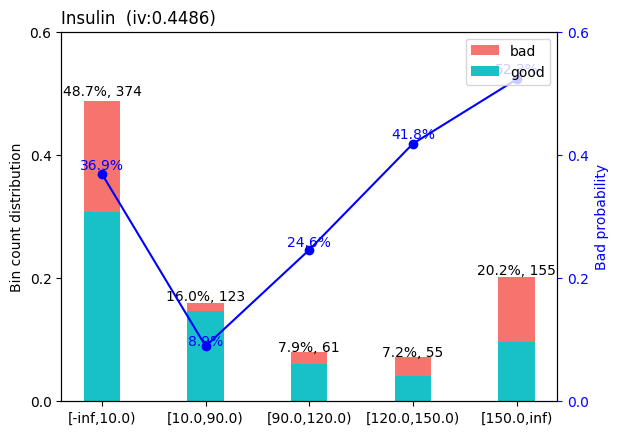

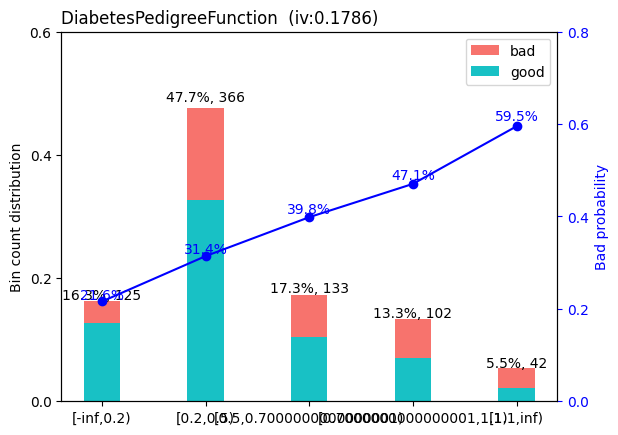

In [17]:
sc.woebin_plot(bins)

Análisis a través WOE - weigth of evidence
IV < 0.02 → Variable no predictiva.

0.02 ≤ IV < 0.1 → Predictividad débil.

0.1 ≤ IV < 0.3 → Predictividad moderada.

0.3 ≤ IV < 0.5 → Predictividad fuerte.

IV ≥ 0.5 → Predictividad muy fuerte (posible sobreajuste).

𝐼𝑉=∑(%Buenos−%Malos)×𝑊𝑂𝐸

𝑊𝑂𝐸=ln(%Buenos/%Malos)

# Procesamiento de datos

In [18]:
X_h2o = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_h2o = 'Outcome'

# Modelado

In [19]:
train, test = data_h2o.split_frame(ratios = [0.8], seed = 1)
nfolds = 5

## General Linear Model

In [20]:
glm_model = H2OGeneralizedLinearEstimator(
    family= "binomial",
    link   = "logit",
    lambda_ = 0,
    compute_p_values = True,
    nfolds=nfolds,
    fold_assignment="Modulo",
    keep_cross_validation_predictions=True,
    seed=1
)
glm_model.train(X_h2o, y_h2o, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1751588426640_1


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              6                             6                              5                       py_4_sid_b2b9

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14689276840116716
RMSE: 0.38326592387162095
LogLoss: 0.45367919937369927
AUC: 0.8519482205229869
AUCPR: 0.7547709413331122
Gini: 0.7038964410459738
Null degrees of freedom: 609
Residual degrees of freedom: 603
Null deviance: 790.5021380012824
Residual deviance: 553.4886232359131
AIC: 567.4886232359131

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28714766699603267
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      286  110  0.2778   (110.0/396.0)
1      38   176  0.1776   (38.0/214.0)
Total  324  286  0.2426   (148.0/610.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.287148     0.704     213
max f2                       0.153136     0.815434  288
max f0point5                 0.585452     0.720551  113
max accuracy                 0.480095     0.795082  140
max precision                0.994496     1         0
max recall                   0.00989366   1         395
max specificity              0.994496     1         0
max absolute_mcc             0.471471     0.538791  144
max min_per_class_accuracy   0.328564     0.766355  193
max mean_per_class_accuracy  0.287148     0.772326  213
max tns                      0.994496     396       0
max fns                      0.994496     213       0
max fps                      0.00104835   396       399
max tps                      0.00989366   214       395
max tnr                      0.994496     1         0
max fnr                      0.994496     0.995327  0
max fpr                      0.00104835   1         399
max tpr                      0.00989366   1         395

Gains/Lift Table: Avg response rate: 35.08 %, avg score: 28.22 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114754                   0.619445           1.62884   1.62884            0.571429         0.697836  0.571429                    0.697836            0.0186916       0.0186916                  62.8838   62.8838            0.0111158
2        0.0213115                   0.601646           0.475078  1.09633            0.166667         0.608079  0.384615                    0.65641             0.0046729       0.0233645                  -52.4922  9.63336            0.00316247
3        0.0311475                   0.55441            1.42523   1.2002             0.5              0.575505  0.421053                    0.630861            0.0140187       0.0373832                  42.5234   20.0197            0.0096054
4        0.0409836                   0.485041           1.42523   1.25421            0.5              0.520344  0.44                        0.604337            0.0140187       0.0514019                  42.5234   25.4206            0.0160483
5        0.0508197                   0.450655           0.950156  1.19536    

In [21]:
coeficientes = glm_model._model_json['output']['coefficients_table'].as_data_frame()
coeficientes

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-9.391256,0.818326,-11.476178,1.737951e-30,-0.892092
1,Pregnancies,0.138306,0.038153,3.625038,2.889186e-04,0.452524
2,Glucose,0.038655,0.004294,9.002665,2.203044e-19,1.236845
3,Insulin,-0.000912,0.000893,-1.020380,3.075482e-01,-0.106833
4,BMI,0.092728,0.016708,5.549906,2.858226e-08,0.739781
5,DiabetesPedigreeFunction,0.892439,0.348300,2.562271,1.039903e-02,0.293796
6,Age,-0.000994,0.010602,-0.093737,9.253177e-01,-0.011732


In [22]:
importancia_predictores = glm_model.varimp(use_pandas=True)
importancia_predictores.head()

,variable,relative_importance,scaled_importance,percentage
0,Glucose,1.236845,1.000000,0.435277
1,BMI,0.739781,0.598120,0.260348
2,Pregnancies,0.452524,0.365869,0.159255
3,DiabetesPedigreeFunction,0.293796,0.237536,0.103394
4,Insulin,0.106833,0.086375,0.037597


Text(0.5, 0.98, 'Importancia de los predictores')

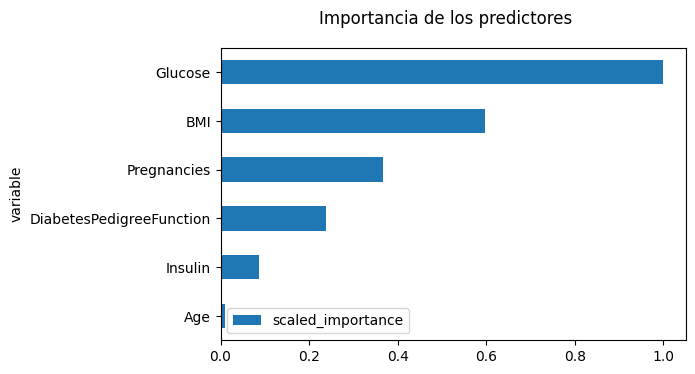

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
importancia_predictores.head(10).plot.barh(x='variable', y='scaled_importance', ax=ax)
ax.invert_yaxis()
fig.suptitle('Importancia de los predictores', fontsize='large')

In [24]:
glm_model_performance = glm_model.model_performance(test_data = test)

In [25]:
glm_model_performance.confusion_matrix()

,0,1,Error,Rate
0,77.0,27.0,0.2596,(27.0/104.0)
1,14.0,40.0,0.2593,(14.0/54.0)
Total,91.0,67.0,0.2595,(41.0/158.0)


auc: 0.7640669515669516
Gini: 0.5281339031339032


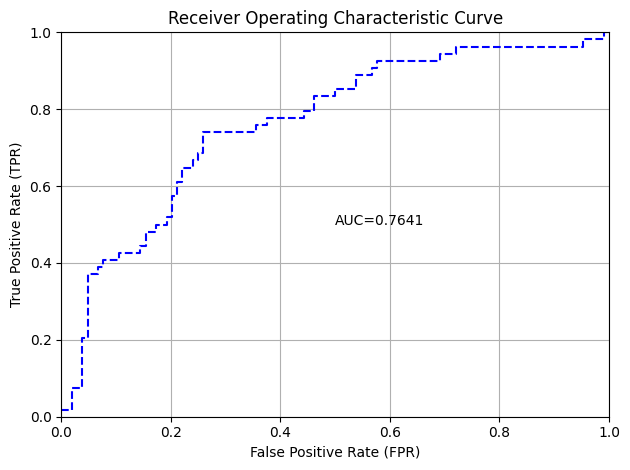

In [26]:
print(f"auc: {glm_model_performance.auc()}")
print(f"Gini: {glm_model_performance.gini()}")
glm_model_performance.plot(type='roc')
print()

## Boosting

In [27]:
hiperparametros = {
    "ntrees":[500, 600, 700],
    "max_depth":[3, 5, 10, 15],
    "min_rows":[5, 10, 15, 20],
}
boost_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator(
        distribution = "bernoulli",
        nfolds=nfolds,
        fold_assignment="Modulo",
        keep_cross_validation_predictions=True,
        seed=1
    ),
    hyper_params = hiperparametros
)
boost_grid.train(X_h2o, y_h2o, training_frame=train)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,min_rows,ntrees,model_ids,logloss
,3.0,20.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_13,0.7247271
,3.0,5.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_1,0.7375139
,3.0,15.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_9,0.7400891
,3.0,10.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_5,0.7409223
,3.0,20.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_29,0.7724117
,3.0,10.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_21,0.7948606
,3.0,15.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_25,0.7964074
,3.0,5.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_17,0.8082942
,3.0,20.0,700.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_45,0.8288002
,3.0,10.0,700.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_37,0.8528246


In [28]:
boost_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table().head(10)

,,max_depth,min_rows,ntrees,model_ids,auc
0,,3.0,5.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.799915
1,,3.0,5.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.794817
2,,3.0,5.0,700.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.791442
3,,10.0,5.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.790911
4,,10.0,5.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.790481
5,,10.0,5.0,700.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.790481
6,,15.0,5.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.788050
7,,10.0,10.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.787944
8,,3.0,10.0,500.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.787590
9,,15.0,5.0,600.0,Grid_GBM_py_4_sid_b2b9_model_python_1751588426...,0.787531


In [29]:
id_boost_model_best = boost_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()['model_ids'][0]
id_boost_model_best

'Grid_GBM_py_4_sid_b2b9_model_python_1751588426640_20_model_1'

In [30]:
boost_model_best = h2o.get_model(id_boost_model_best)

In [31]:
importancia_predictores = boost_model_best.varimp(use_pandas=True)
importancia_predictores

,variable,relative_importance,scaled_importance,percentage
0,Glucose,237.061020,1.000000,0.394107
1,BMI,140.960358,0.594616,0.234342
2,DiabetesPedigreeFunction,80.315331,0.338796,0.133522
3,Age,63.709171,0.268746,0.105915
4,Pregnancies,43.026054,0.181498,0.071529
5,Insulin,36.443039,0.153729,0.060585


Text(0.5, 0.98, 'Importancia de los predictores')

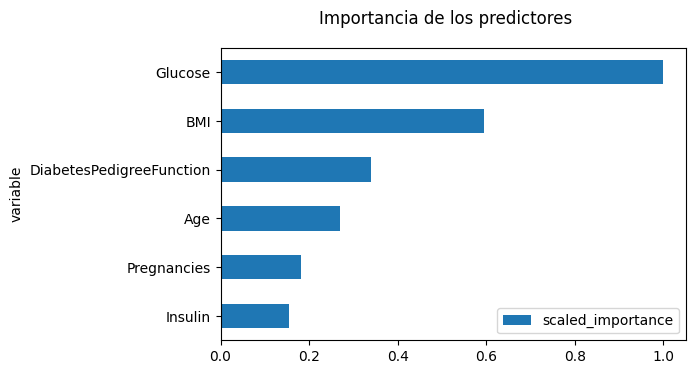

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
importancia_predictores.head(10).plot.barh(x='variable', y='scaled_importance', ax=ax)
ax.invert_yaxis()
fig.suptitle('Importancia de los predictores', fontsize='large')

In [33]:
boost_model_best_performance = boost_model_best.model_performance(test_data = test)

In [34]:
boost_model_best_performance.confusion_matrix()

,0,1,Error,Rate
0,85.0,19.0,0.1827,(19.0/104.0)
1,19.0,35.0,0.3519,(19.0/54.0)
Total,104.0,54.0,0.2405,(38.0/158.0)


auc: 0.7868589743589743
Gini: 0.5737179487179487


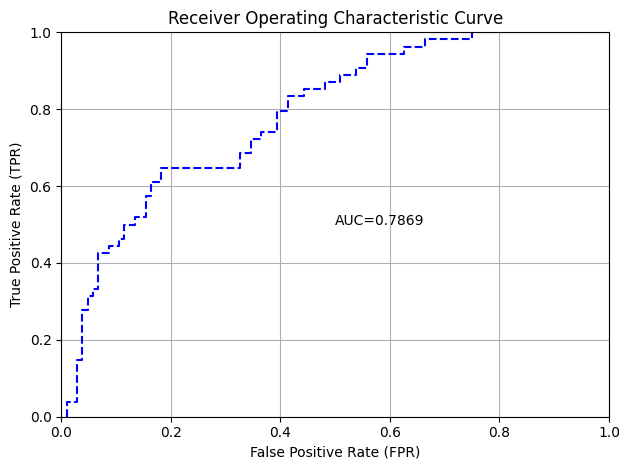

In [35]:
print(f"auc: {boost_model_best_performance.auc()}")
print(f"Gini: {boost_model_best_performance.gini()}")
boost_model_best_performance.plot(type='roc')
print()

## Deep Learning

In [36]:
hiperparametros = {
    "hidden":[5, 10, 15],
    "epochs":[500, 1000, 1500, 2000]
}
dl_grid = H2OGridSearch(
    model=H2ODeepLearningEstimator(
        distribution="bernoulli",
        nfolds=nfolds,
        fold_assignment="Modulo",
        keep_cross_validation_predictions=True,
        seed=1
    ),
    hyper_params=hiperparametros
)
dl_grid.train(X_h2o, y_h2o, training_frame=train)

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


,epochs,hidden,model_ids,logloss
,504.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_1,0.5021178
,2000.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_4,0.5094877
,1504.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_3,0.5145857
,1000.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_2,0.5317712
,504.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_9,0.5944934
,1000.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_10,0.6182439
,1504.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_11,0.6200205
,1504.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_7,0.6247747
,2000.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_8,0.6393136
,504.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_5,0.6462362


In [37]:
dl_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table().head(10)

,,epochs,hidden,model_ids,auc
0,,2000.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.831262
1,,504.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.828631
2,,1504.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.822577
3,,1000.0,5.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.810223
4,,1504.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.801473
5,,504.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.797708
6,,2000.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.795850
7,,1000.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.794876
8,,1504.0,10.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.789849
9,,1000.0,15.0,Grid_DeepLearning_py_4_sid_b2b9_model_python_1...,0.789071


In [38]:
id_dl_model_best = dl_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()['model_ids'][0]
id_dl_model_best

'Grid_DeepLearning_py_4_sid_b2b9_model_python_1751588426640_216936_model_4'

In [39]:
dl_model_best = h2o.get_model(id_dl_model_best)
dl_model_best_performance = dl_model_best.model_performance(test_data = test)

In [40]:
dl_model_best = h2o.get_model(id_dl_model_best)
dl_model_best_performance = dl_model_best.model_performance(test_data = test)

In [41]:
dl_model_best_performance.confusion_matrix()

,0,1,Error,Rate
0,75.0,29.0,0.2788,(29.0/104.0)
1,12.0,42.0,0.2222,(12.0/54.0)
Total,87.0,71.0,0.2595,(41.0/158.0)


auc: 0.7905982905982907
Gini: 0.5811965811965814


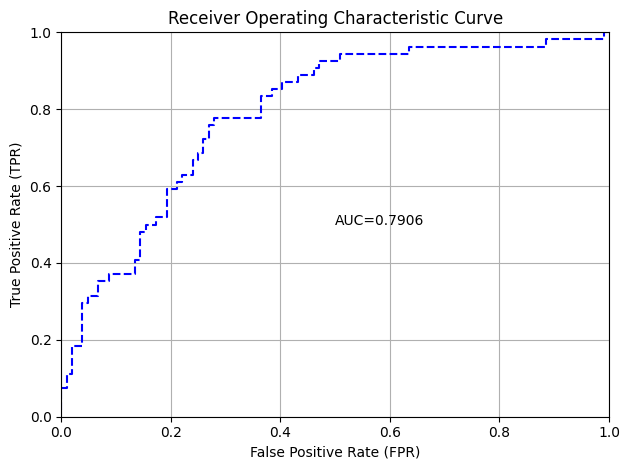

In [42]:
print(f"auc: {dl_model_best_performance.auc()}")
print(f"Gini: {dl_model_best_performance.gini()}")
dl_model_best_performance.plot(type='roc')
print()

## Naive Bayes

In [43]:
nb_model = H2ONaiveBayesEstimator(
    laplace=0,
    nfolds=nfolds,
    fold_assignment="Modulo",
    keep_cross_validation_predictions=True,
    seed=1
)
nb_model.train(X_h2o, y=y_h2o, training_frame=train)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ONaiveBayesEstimator : Naive Bayes
Model Key: NaiveBayes_model_python_1751588426640_217325


Model Summary: 
    number_of_response_levels    min_apriori_probability    max_apriori_probability
--  ---------------------------  -------------------------  -------------------------
    2                            0.35082                    0.64918

ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.16568033939182852
RMSE: 0.4070384986605426
LogLoss: 0.5693517876444134
Mean Per-Class Error: 0.24081940904370808
AUC: 0.8321297082979325
AUCPR: 0.6992129927107853
Gini: 0.6642594165958651

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33465603392083365
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      320  76   0.1919   (76.0/396.0)
1      62   152  0.2897   (62.0/214.0)
Total  382  228  0.2262   (138.0/610.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.334656     0.687783  176
max f2                       0.0578944    0.803846  323
max f0point5                 0.4801       0.701663  141
max accuracy                 0.4801       0.785246  141
max precision                0.999136     0.866667  2
max recall                   0.00267394   1         397
max specificity              0.999919     0.994949  0
max absolute_mcc             0.440005     0.51997   147
max min_per_class_accuracy   0.25175      0.747475  200
max mean_per_class_accuracy  0.334656     0.759181  176
max tns                      0.999919     394       0
max fns                      0.999919     205       0
max fps                      0.000171185  396       399
max tps                      0.00267394   214       397
max tnr                      0.999919     0.994949  0
max fnr                      0.999919     0.957944  0
max fpr                      0.000171185  1         399
max tpr                      0.00267394   1         397

Gains/Lift Table: Avg response rate: 35.08 %, avg score: 34.12 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114754                   0.999958           2.44326    2.44326            0.857143         0.999986    0.857143                    0.999986            0.0280374       0.0280374                  144.326   144.326            0.0255121
2        0.0213115                   0.99945            2.37539    2.41193            0.833333         0.999721    0.846154                    0.999864            0.0233645       0.0514019                  137.539   141.193            0.0463514
3        0.0311475                   0.997764           1.90031    2.25037            0.666667         0.998528    0.789474                    0.999442            0.0186916       0.0700935                  90.0312   125.037            0.0599924
4        0.0409836                   0.996158           1.90031    2.16636            0.666667         0.997038    0.76                        0.998865            0.0186916       0.088785                   90.0312   116.636            0.0736335
5        0.0508197                   0.991929           2.37539    2.20681            0.833333         0.993973    0.774194                    0.997918            0.0233645       0.11215                    137.539   120.681            0.0944728
6        0.1                         0.949077           2.09034    2.14953            0.733333         0.973757    0.754098 

In [45]:
nb_model_performance = nb_model.model_performance(test_data=test)

In [46]:
nb_model_performance.confusion_matrix()

,0,1,Error,Rate
0,72.0,32.0,0.3077,(32.0/104.0)
1,10.0,44.0,0.1852,(10.0/54.0)
Total,82.0,76.0,0.2658,(42.0/158.0)


auc: 0.7861467236467236
Gini: 0.5722934472934471


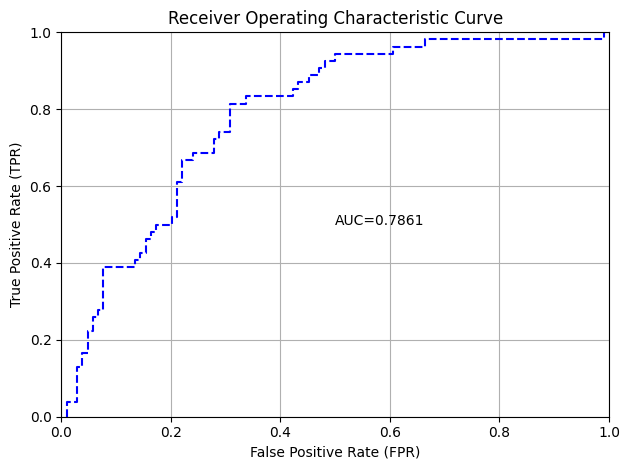

In [47]:
print(f"auc: {nb_model_performance.auc()}")
print(f"Gini: {nb_model_performance.gini()}")
nb_model_performance.plot(type='roc')
print()

## Random Forest

In [48]:
hyper_params = {
    'ntrees': [50, 100, 150],
    'max_depth': [20, 30, 40],
    'min_rows': [1, 2, 5]
}
rf_grid = H2OGridSearch(
    model=H2ORandomForestEstimator(
        distribution = "bernoulli",
        nfolds=nfolds,
        fold_assignment="Modulo",
        keep_cross_validation_predictions=True,
        seed=1
    ),
    hyper_params=hyper_params
)
rf_grid.train(X_h2o, y_h2o, training_frame=train)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,min_rows,ntrees,model_ids,logloss
,20.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_25,0.4698831
,30.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_26,0.4698831
,40.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_27,0.4698831
,20.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_16,0.4711060
,30.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_17,0.4711060
,40.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_18,0.4711060
,30.0,1.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_11,0.4748173
,40.0,1.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_12,0.4748173
,20.0,1.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_10,0.4748959
,20.0,5.0,50.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_7,0.4750434


In [49]:
rf_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table().head(10)

,,max_depth,min_rows,ntrees,model_ids,auc
0,,20.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.839121
1,,30.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.839121
2,,40.0,5.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.839121
3,,20.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.837959
4,,30.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.837959
5,,40.0,5.0,100.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.837959
6,,20.0,5.0,50.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.835074
7,,30.0,5.0,50.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.835074
8,,40.0,5.0,50.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.835074
9,,20.0,2.0,150.0,Grid_DRF_py_4_sid_b2b9_model_python_1751588426...,0.834596


In [50]:
id_rf_model_best = rf_grid.get_grid(sort_by="auc", decreasing=True).sorted_metric_table()['model_ids'][0]
id_rf_model_best

'Grid_DRF_py_4_sid_b2b9_model_python_1751588426640_217345_model_25'

In [51]:
rf_model_best = h2o.get_model(id_rf_model_best)
rf_model_best_peformance = rf_model_best.model_performance(test)

In [52]:
rf_model_best_peformance.confusion_matrix()

,0,1,Error,Rate
0,81.0,23.0,0.2212,(23.0/104.0)
1,14.0,40.0,0.2593,(14.0/54.0)
Total,95.0,63.0,0.2342,(37.0/158.0)


auc: 0.7964743589743589
Gini: 0.5929487179487178


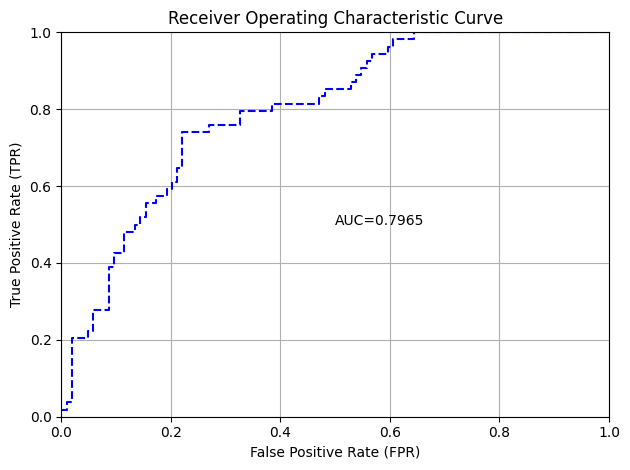

In [53]:
print(f"auc: {rf_model_best_peformance.auc()}")
print(f"Gini: {rf_model_best_peformance.gini()}")
rf_model_best_peformance.plot(type='roc')
print()

## Stacking

In [54]:
ensemble = H2OStackedEnsembleEstimator(model_id="my_stacked",
                                       base_models=[glm_model, boost_model_best, dl_model_best, nb_model, rf_model_best])

ensemble.train(x=X_h2o, y=y_h2o, training_frame=train)

stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# NaiveBayes base models (used / total),1/1
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [55]:
ensemble_performance = ensemble.model_performance(test)

In [56]:
ensemble_performance.confusion_matrix()

,0,1,Error,Rate
0,73.0,31.0,0.2981,(31.0/104.0)
1,11.0,43.0,0.2037,(11.0/54.0)
Total,84.0,74.0,0.2658,(42.0/158.0)


auc: 0.7964743589743589
Gini: 0.5929487179487178


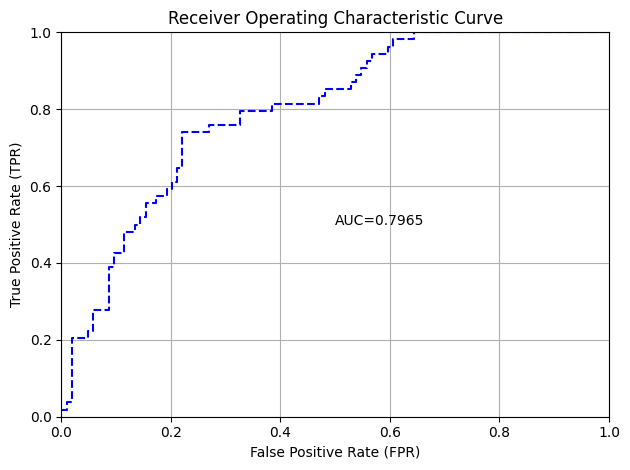

In [57]:
print(f"auc: {rf_model_best_peformance.auc()}")
print(f"Gini: {rf_model_best_peformance.gini()}")
rf_model_best_peformance.plot(type='roc')
print()

## AutoML

In [58]:
train, valid, test = data_h2o.split_frame(ratios = [0.7, 0.15], seed = 1234)

In [59]:
automl_model = H2OAutoML(max_models=10,
                         seed=1)
automl_model.train(X_h2o,y_h2o,training_frame = train,leaderboard_frame = valid)

AutoML progress: |
20:48:23.629: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250703_204823


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 42                          4268                   2            3            2.35714       3             4             3.42857

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14478280931516824
RMSE: 0.380503363079971
LogLoss: 0.44773329111556925
Mean Per-Class Error: 0.19466525987165403
AUC: 0.8645791177660865
AUCPR: 0.7465679297903283
Gini: 0.7291582355321731

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36083831932672783
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      275  78   0.221    (78.0/353.0)
1      33   163  0.1684   (33.0/196.0)
Total  308  241  0.2022   (111.0/549.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.360838     0.745995  189
max f2                       0.208469     0.819309  267
max f0point5                 0.595804     0.723684  95
max accuracy                 0.419305     0.799636  169
max precision                0.828274     0.888889  10
max recall                   0.0822738    1         357
max specificity              0.855969     0.997167  0
max absolute_mcc             0.360838     0.589573  189
max min_per_class_accuracy   0.389244     0.798867  178
max mean_per_class_accuracy  0.360838     0.805335  189
max tns                      0.855969     352       0
max fns                      0.855969     193       0
max fps                      0.0337429    353       399
max tps                      0.0822738    196       357
max tnr                      0.855969     0.997167  0
max fnr                      0.855969     0.984694  0
max fpr                      0.0337429    1         399
max tpr                      0.0822738    1         357

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.91 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010929                    0.849307           1.86735   1.86735            0.666667         0.854991  0.666667                    0.854991            0.0204082       0.0204082                  86.7347   86.7347            0.0147424
2        0.0218579                   0.844472           2.80102   2.33418            1                0.845245  0.833333                    0.850118            0.0306122       0.0510204                  180.102   133.418            0.0453547
3        0.0327869                   0.828274           2.80102   2.4898             1                0.832951  0.888889                    0.844395            0.0306122       0.0816327                  180.102   148.98             0.0759669
4        0.0400729                   0.815286           2.10077   2.41906            0.75             0.824615  0.863636                    0.840799            0.0153061       0.0969388                  110.077   141.906            0.0884402
5        0.0528233                   0.811515           2.40087   2.41467            0.857143         0.812968  0.862069                    0.834081            0.0306

In [60]:
id_automl_model_best = automl_model.leaderboard[0,0]
id_automl_model_best

'GBM_1_AutoML_1_20250703_204823'

In [61]:
automl_model.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250703_204823


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    42                 42                          4268                   2            3            2.35714       3             4             3.42857

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14478280931516824
RMSE: 0.380503363079971
LogLoss: 0.44773329111556925
Mean Per-Class Error: 0.19466525987165403
AUC: 0.8645791177660865
AUCPR: 0.7465679297903283
Gini: 0.7291582355321731

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36083831932672783
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      275  78   0.221    (78.0/353.0)
1      33   163  0.1684   (33.0/196.0)
Total  308  241  0.2022   (111.0/549.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.360838     0.745995  189
max f2                       0.208469     0.819309  267
max f0point5                 0.595804     0.723684  95
max accuracy                 0.419305     0.799636  169
max precision                0.828274     0.888889  10
max recall                   0.0822738    1         357
max specificity              0.855969     0.997167  0
max absolute_mcc             0.360838     0.589573  189
max min_per_class_accuracy   0.389244     0.798867  178
max mean_per_class_accuracy  0.360838     0.805335  189
max tns                      0.855969     352       0
max fns                      0.855969     193       0
max fps                      0.0337429    353       399
max tps                      0.0822738    196       357
max tnr                      0.855969     0.997167  0
max fnr                      0.855969     0.984694  0
max fpr                      0.0337429    1         399
max tpr                      0.0822738    1         357

Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.91 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010929                    0.849307           1.86735   1.86735            0.666667         0.854991  0.666667                    0.854991            0.0204082       0.0204082                  86.7347   86.7347            0.0147424
2        0.0218579                   0.844472           2.80102   2.33418            1                0.845245  0.833333                    0.850118            0.0306122       0.0510204                  180.102   133.418            0.0453547
3        0.0327869                   0.828274           2.80102   2.4898             1                0.832951  0.888889                    0.844395            0.0306122       0.0816327                  180.102   148.98             0.0759669
4        0.0400729                   0.815286           2.10077   2.41906            0.75             0.824615  0.863636                    0.840799            0.0153061       0.0969388                  110.077   141.906            0.0884402
5        0.0528233                   0.811515           2.40087   2.41467            0.857143         0.812968  0.862069                    0.834081            0.0306

In [62]:
automl_model_best = h2o.get_model(id_automl_model_best)
automl_model_best_performance = automl_model_best.model_performance(test_data = test)

auc: 0.8448863636363637
Gini: 0.6897727272727274


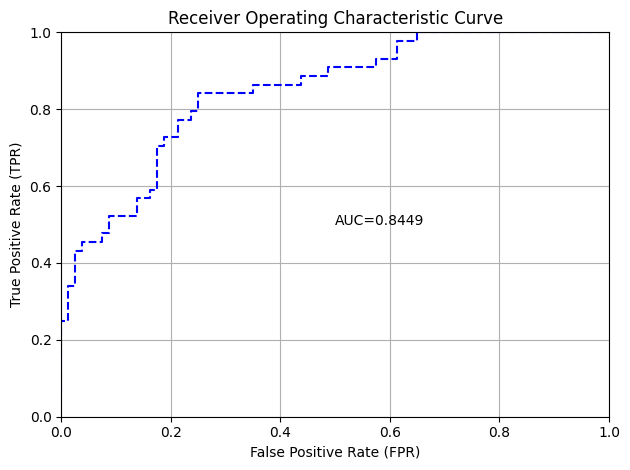

In [63]:
print(f"auc: {automl_model_best_performance.auc()}")
print(f"Gini: {automl_model_best_performance.gini()}")
automl_model_best_performance.plot(type='roc')
print()

# Conclusiones

In [64]:
performances = [glm_model_performance, boost_model_best_performance, dl_model_best_performance, nb_model_performance, rf_model_best_peformance, ensemble_performance, automl_model_best_performance]

metrics_df = h2o.H2OFrame({
    'Model': ["GLM", "Boosting", 'Deep Learning', 'Naive Bayes', 'Random Forest', 'Stacking', 'AutoML'],
    'AUC': [performance.auc() for performance in performances],
    'Gini': [performance.gini() for performance in performances]
}, column_names=["Model", "AUC", "Gini"])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
metrics_df

Model,AUC,Gini
GLM,0.764067,0.528134
Boosting,0.786859,0.573718
Deep Learning,0.790598,0.581197
Naive Bayes,0.786147,0.572293
Random Forest,0.796474,0.592949
Stacking,0.794872,0.589744
AutoML,0.844886,0.689773
